# US Protest Analysis

Name: **Quan Phan**

Linkedin: [linkedin.com/in/leopha/](https://www.linkedin.com/in/leopha/)

## Objective 
The purpose of this take-home exam is to assess your ability to derive meaningful insights from a dataset focused on protest activity in the United States. You are tasked with analyzing the provided dataset and communicating your findings in a concise and impactful manner. Your submission should consist of a 1-to-2-page memo or slide deck that highlights your top insights, accompanied by a brief methodology section. Including your code as part of your submission is also required. 

## Dataset Overview 
You will be given a dataset containing information on various protest activities across the United States. This dataset includes details such as the date, location (state/city), the parties involved in the activity, and additional notes describing the event. Not all columns may be relevant to your analysis.  Dataset can be accessed at the link below.

## Guidance 
We encourage you to approach this dataset as if a stakeholder provided the dataset without defined questions. Therefore, as the data specialist, it is your job to understand the dataset and communicate these findings to stakeholders involved on the project. 

The analysis should start with an understanding of the data at hand. While the approach to analyzing the dataset is open-ended, we highly recommend the use of data visuals and descriptive statistics to uncover and communicate insights effectively. Ensure that your findings are supported by data and presented in a clear, understandable format for stakeholders with varying levels of data literacy. 

## Submission Requirements 
Memo/Slide Deck: Summarize your insights in a 1–2-page memo or a slide deck. We strongly encourage the use of data visualization to support your insights. 
Code: Submit the code used for your analysis. If you are familiar with version control tools, such as Git, we encourage their use here. If you use a VCS, please submit the repository. 


## Evaluation Criteria 

**Implementation**:  

- Code Quality: Organization, readability, and documentation of your code. 
- Data Quality: How well the dataset was cleaned, preprocessed, and utilized in the analysis. 

**Results**: 

- Data Thoughtfulness: Depth of understanding demonstrated for the dataset and problem space. 
- Communication of Findings: Effectiveness in communicating insights, especially the quality of data visualization and the clarity of narrative. 


## Preliminary Questions

Who, what, when, where, why, how

- What: what are the theme of the protests
- Who: who were the protestors (young people, students, factory workers, veterans?). Who were they protesting against (compnanies, local/state/federal/foregin nation government)
- Where: distribution of locations of protests. Which states/counties/cities saw the most protest, and why?
- When: data length (earliest date to latest date). CDF, distrbution, etc.
- How: how did protest occur? How long, spontanous, methodology: sit-down, walk-out, boycott, screaming, violence, 
- Why: why did protests occur? To response to a local, state, federal, global issue/action? What they try to achieve?

- Source: is the source trustworthy? Is it biased?
- Aftermath/Results: did the protestors achieve what they want? Did anyone get hurt? Was anyone being prosecuted? Did anyone get harmed?

## Dataset

**Removed columns**:
- ISO: they are the same number
- event_id_cnty: don't need id
- event_id_no_cnty: don't need id
- interaction: some weird number
- region: it's always North America
- country: it's all United States
- iso3: it's all USA
- admin3: empty column
  

**Columns that may not be useful**:
- inter1
- inter2
- timestamp: timestamp of what? Maybe entry timestamp not event timestamp
- fatilites: a code number [0-3], not sure what do they mean

**unique column**:
- Data_id

**Columns maye need to be clean for high presion**:
- time_precision: only want value 1
- geo_precision: only want value 1


**Columns that may not be available until the event already happened**:
- actor1
- actor2


# Code

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.ticker import PercentFormatter

# some plots need to be exported as pdf to retain image quality (optional)
from matplotlib.backends.backend_pdf import PdfPages

sns.set_theme()

In [380]:
df = pd.read_csv('North_America-United_States.csv')
df.set_index('data_id', inplace=True)

df = df[[
    'event_date',
    'year',
    'event_type',
    'sub_event_type',
    'actor1',
    'assoc_actor_1',
    'actor2',
    'assoc_actor_2',
    'admin1',   # state
    'admin2',   # county
    'location', # city
    'latitude',
    'longitude',
    'source',
    'source_scale', # type of source
    'notes',
]]

df

,event_date,year,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,admin1,admin2,location,latitude,longitude,source,source_scale,notes
data_id,,,,,,,,,,,,,,,,
9383068,24 June 2022,2022,Protests,Excessive force against protesters,Protesters (United States),Women (United States),Sole Perpetrator (United States),NaN,Iowa,Linn,Cedar Rapids,41.9738,-91.6768,KCRG-TV9; Network Contagion Research Institute...,Local partner-National,"On 24 June 2022, 'pro-choice' protesters gathe..."
9383099,24 June 2022,2022,Protests,Peaceful protest,Protesters (United States),DEM: Democratic Party; Women (United States),NaN,NaN,Arkansas,Washington,Fayetteville,36.0626,-94.1574,Southwest Times Record; 40/29,Subnational,"On 24 June 2022, well over 100 people includin..."
9383100,24 June 2022,2022,Protests,Peaceful protest,Protesters (United States),Women (United States),NaN,NaN,California,Humboldt,Eureka,40.8040,-124.1654,Lost Coast Outpost; North Coast Journal,Subnational,"On 24 June 2022, hundreds of people rallied ou..."
9383101,24 June 2022,2022,Protests,Peaceful protest,Protesters (United States),Women (United States); Government of the Unite...,NaN,NaN,California,Los Angeles,West Hollywood,34.0900,-118.3617,CBS News; Liveuamap,Local partner-New media,"On 24 June 2022, hundreds of people rallied in..."
9383102,24 June 2022,2022,Protests,Peaceful protest,Protesters (United States),Women (United States),NaN,NaN,California,Monterey,Monterey,36.6031,-121.8936,Monterey County Herald; KSBW8,Subnational,"On 24 June 2022, hundreds of people rallied at..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616930,01 January 2020,2020,Protests,Peaceful protest,Protesters (United States),Government of the United States (2017-2021),NaN,NaN,Arizona,Maricopa,Phoenix,33.4492,-112.0741,Count Love; Channel 12 (Mesa),Other-Subnational,"On 1 January 2020, a group of people gathered ..."
7617409,01 January 2020,2020,Protests,Peaceful protest,Protesters (United States),NaN,NaN,NaN,New York,New York,New York - Manhattan,40.7834,-73.9663,CBS2 (New York),Subnational,"On 1 January 2020, protesters gathered at NYPD..."
7617578,01 January 2020,2020,Protests,Peaceful protest,Protesters (United States),BLM: Black Lives Matter,NaN,NaN,California,Alameda,Oakland,37.8044,-122.2711,KTVU Fox2,Subnational,"On 1 January 2020, a group of people gathered ..."


## When

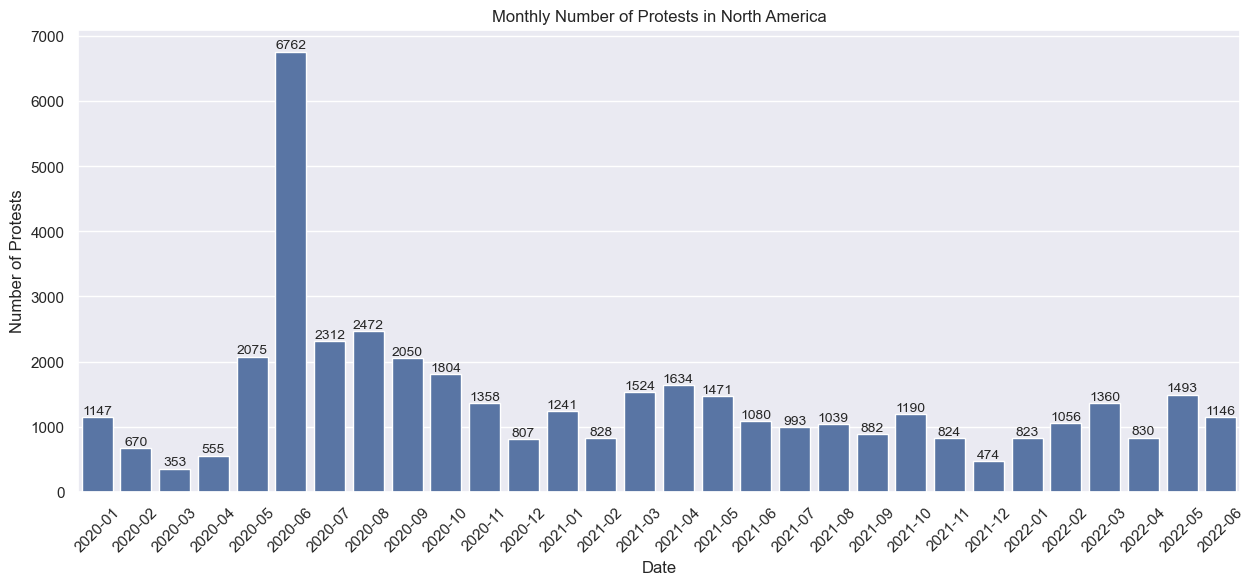

In [381]:
# convert event_date to datetime
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# count of events per year month
monthly_count = df['event_date'].dt.to_period('M').value_counts().sort_index()
monthly_count

plt.figure(figsize=(15, 6))

ax = sns.barplot(x=monthly_count.index, y=monthly_count.values, color='b')
ax.bar_label(ax.containers[0], fontsize=10)

plt.xticks(rotation=45)

plt.title('Monthly Number of Protests in North America')
plt.xlabel('Date')
plt.ylabel('Number of Protests')

plt.show()

## Where

In [382]:
# create geopandas variable for states and countries
states_gdf = gpd.read_file('./usa-states-census-2014/usa-states-census-2014.shp')
counties_gdf = gpd.read_file('./cb_2022_us_county_500k/cb_2022_us_county_500k.shp')

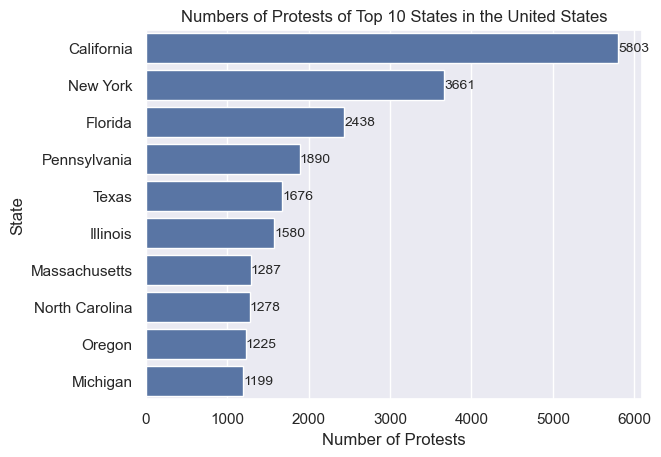

In [383]:
# admin1 is state
protest_by_states = df['admin1'].value_counts()
ax = sns.barplot(y=protest_by_states[:10].index,x=protest_by_states[:10], color='b')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Numbers of Protests of Top 10 States in the United States')
plt.ylabel('State')
plt.xlabel('Number of Protests')
plt.show()

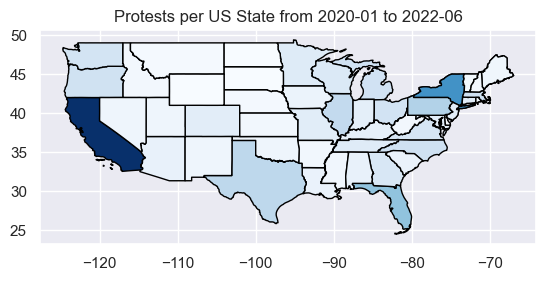

In [515]:
states_gdf['protest_count'] = states_gdf['NAME'].map(protest_by_states)
states_gdf.plot(column='protest_count', cmap='Blues', linewidth=1, edgecolor='black')
plt.title('Protests per US State from 2020-01 to 2022-06')
plt.show()

### County level

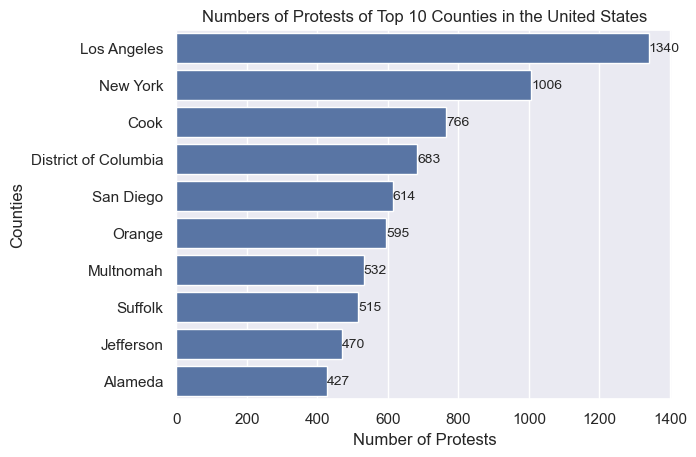

In [385]:
protest_by_counties = df['admin2'].value_counts()
ax = sns.barplot(y=protest_by_counties[:10].index,x=protest_by_counties[:10], color='b')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Numbers of Protests of Top 10 Counties in the United States')
plt.ylabel('Counties')
plt.xlabel('Number of Protests')
plt.show()

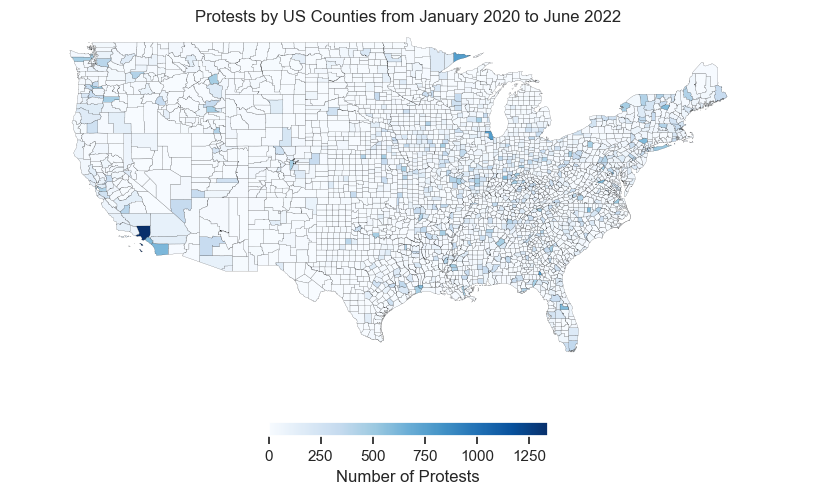

In [386]:
protest_by_counties = df['admin2'].value_counts()
counties_gdf['protest_count'] = counties_gdf['NAME'].map(protest_by_counties)
counties_gdf['protest_count'] = counties_gdf['protest_count'].fillna(0)

with PdfPages('Protests by US Counties from January 2020 to June 2022.pdf') as pdf:
    ax = counties_gdf.plot(column='protest_count', cmap='Blues', linewidth=0.1, edgecolor='black', figsize=(12,6), 
                        legend=True, legend_kwds={
                            'orientation': 'horizontal',
                            'shrink': 0.3,
                            'label': 'Number of Protests',
                            }
                        )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('white')
    plt.title('Protests by US Counties from January 2020 to June 2022')
    plt.xlim(-130, -60)
    plt.ylim(25, 50)
    pdf.savefig() 
    plt.show()
    plt.close()

### Riots per State

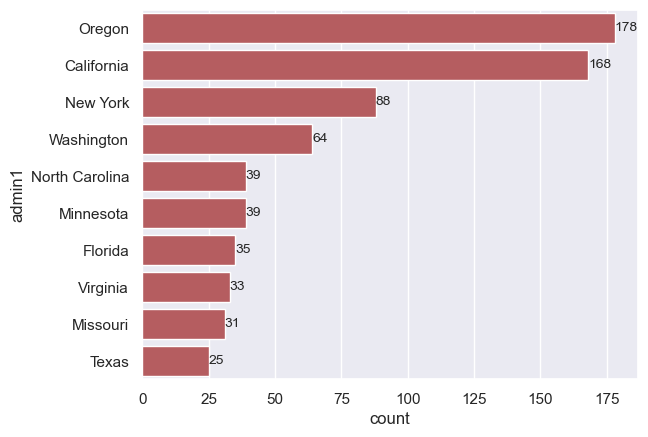

In [387]:
riots_by_states = df[df['event_type']=='Riots']['admin1'].value_counts()
ax = sns.barplot(y=riots_by_states[:10].index,x=riots_by_states[:10], color='r')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

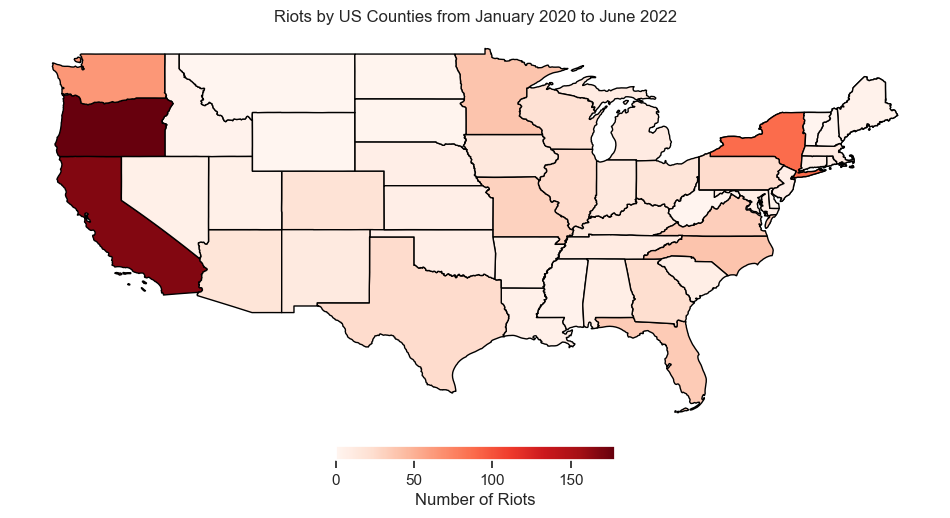

In [388]:
states_gdf['riots_count'] = states_gdf['NAME'].map(riots_by_states)
states_gdf['riots_count'] = states_gdf['riots_count'].fillna(0)

title = 'Riots by US Counties from January 2020 to June 2022'

with PdfPages(f'{title}.pdf') as pdf:
    ax = states_gdf.plot(column='riots_count', cmap='Reds', linewidth=1, edgecolor='black', figsize=(12,12),
                        legend=True, legend_kwds={
                            'orientation': 'horizontal',
                            'shrink': 0.3,
                            'label': 'Number of Riots',
                            'panchor': (0.5, -0.5),
                            })
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('white')
    plt.title(title)
    plt.show()

#### County Level

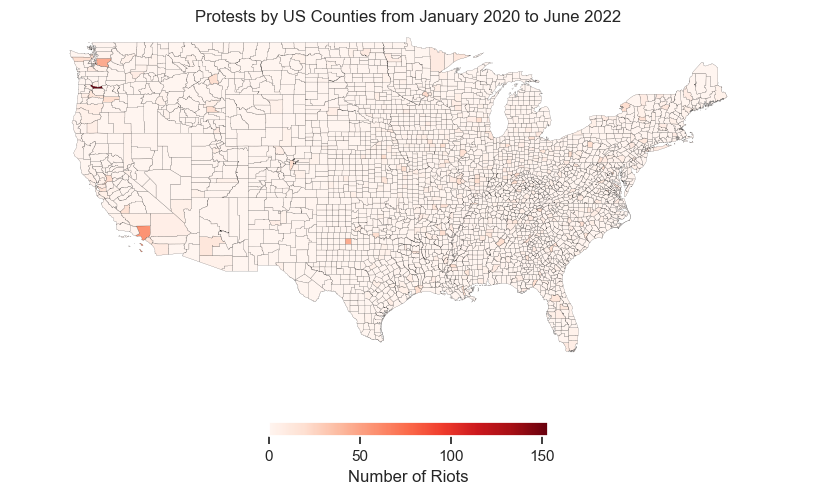

In [518]:
riots_by_counties = df[df['event_type']=='Riots']['admin2'].value_counts()
counties_gdf['riots_count'] = counties_gdf['NAME'].map(riots_by_counties)
counties_gdf['riots_count'] = counties_gdf['riots_count'].fillna(0)

ax = counties_gdf.plot(column='riots_count', cmap='Reds', linewidth=0.1, edgecolor='black', figsize=(12,6), 
                    legend=True, legend_kwds={
                        'orientation': 'horizontal',
                        'shrink': 0.3,
                        'label': 'Number of Riots',
                        }
                    )
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('white')
plt.title('Protests by US Counties from January 2020 to June 2022')
plt.xlim(-130, -60)
plt.ylim(25, 50)
plt.show()

### Riot-to-Protest ratio

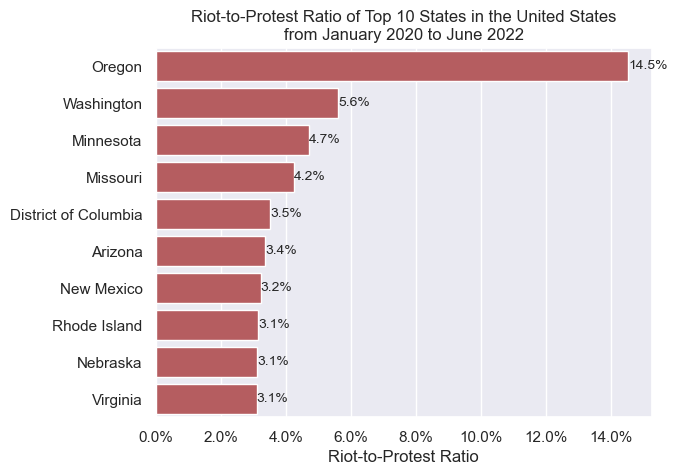

In [509]:
riot_ratio_by_states = (riots_by_states/protest_by_states * 100).round(2).sort_values(ascending=False)
ax = sns.barplot(y=riot_ratio_by_states[:10].index,x=riot_ratio_by_states[:10], color='r')

# format the x-axis labels as percentages
ax.xaxis.set_major_formatter(PercentFormatter(100))

ax.bar_label(ax.containers[0], labels=[f"{i:.1f}%" for i in ax.containers[0].datavalues], fontsize=10)
plt.xlabel('Riot-to-Protest Ratio')
plt.ylabel('')
plt.title('Riot-to-Protest Ratio of Top 10 States in the United States\nfrom January 2020 to June 2022')
plt.show()

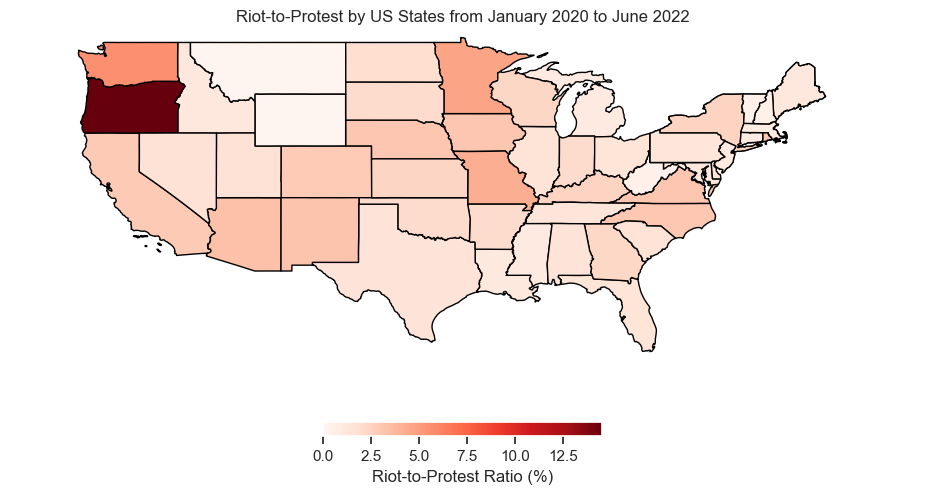

In [391]:
states_gdf['riot_ratio'] = states_gdf['NAME'].map(riot_ratio_by_states)
states_gdf['riot_ratio'] = states_gdf['riot_ratio'].fillna(0)

title = 'Riot-to-Protest by US States from January 2020 to June 2022'

with PdfPages(f'{title}.pdf') as pdf:
    ax = states_gdf.plot(column='riot_ratio', cmap='Reds', linewidth=1.0, edgecolor='black', figsize=(12,6), 
                        legend=True, legend_kwds={
                            'orientation': 'horizontal',
                            'shrink': 0.3,
                            'label': 'Riot-to-Protest Ratio (%)',
                            'panchor': (0.5, -1.0),
                            }
                        )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('white')
    plt.title(title)
    plt.xlim(-130, -60)
    plt.ylim(25, 50)
    pdf.savefig()
    plt.show()
    plt.close()

#### County Level

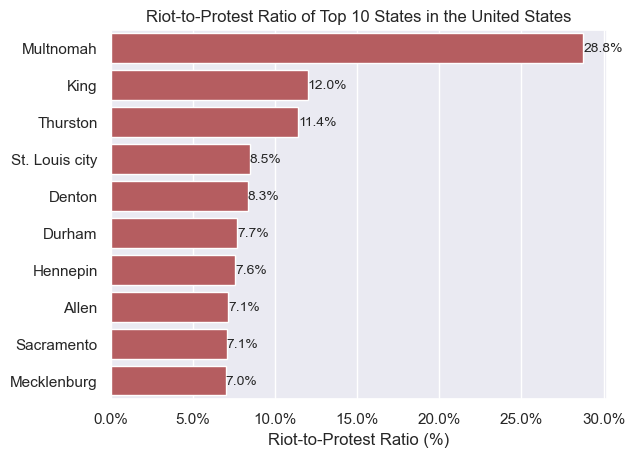

In [527]:
riot_ratio_by_counties = (riots_by_counties/protest_by_counties).sort_values(ascending=False)
riot_ratio_by_counties = riot_ratio_by_counties[protest_by_counties > 30]
ax = sns.barplot(y=riot_ratio_by_counties[:10].index,x=riot_ratio_by_counties[:10], color='r')


ax.bar_label(ax.containers[0], fontsize=10, labels=[f"{i:.1%}" for i in ax.containers[0].datavalues])
ax.xaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Riot-to-Protest Ratio (%)')
plt.ylabel('')
plt.title('Riot-to-Protest Ratio of Top 10 States in the United States')
plt.show()

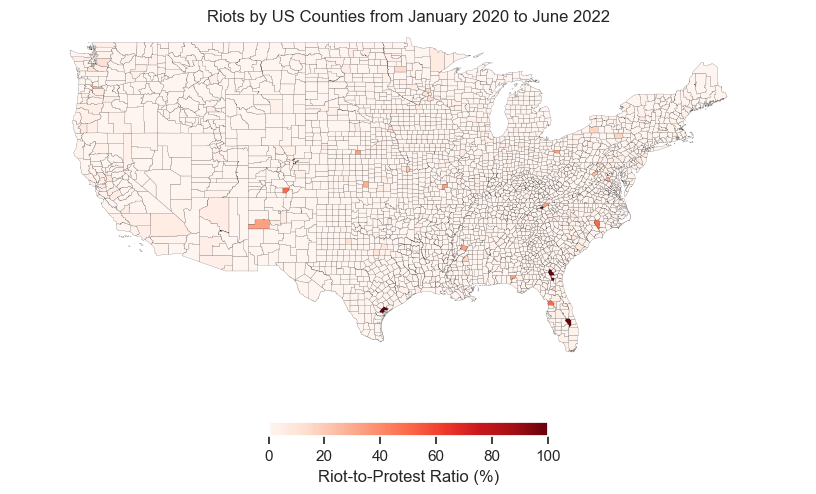

In [531]:
riot_ratio_by_counties = (riots_by_counties/protest_by_counties * 100)
counties_gdf['riot_ratio'] = counties_gdf['NAME'].map(riot_ratio_by_counties)
counties_gdf['riot_ratio'] = counties_gdf['riot_ratio'].fillna(0)

ax = counties_gdf.plot(column='riot_ratio', cmap='Reds', linewidth=0.1, edgecolor='black', figsize=(12,6), 
                    legend=True, legend_kwds={
                        'orientation': 'horizontal',
                        'shrink': 0.3,
                        'label': 'Riot-to-Protest Ratio (%)',
                        }
                    )
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('white')
plt.title('Riots by US Counties from January 2020 to June 2022')
plt.xlim(-130, -60)
plt.ylim(25, 50)
plt.show()

## Actor Analysis

### Get list of actors

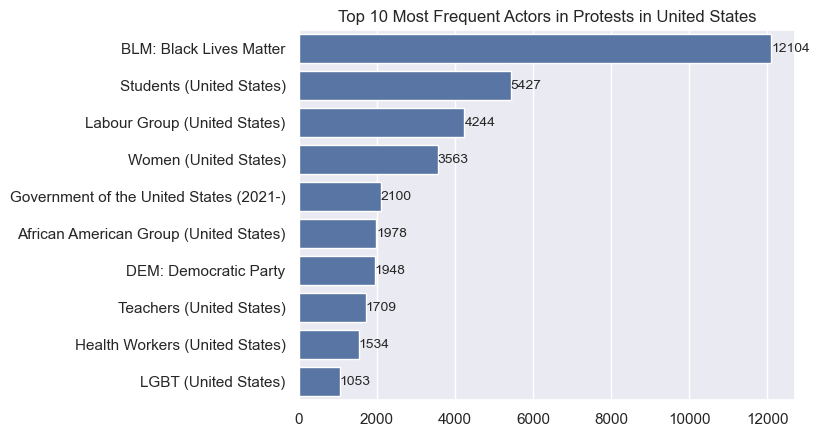

In [394]:
protestors_freq = dict()
association_actor_cols = [
    'assoc_actor_1',
    'assoc_actor_2',
]

for col in association_actor_cols:
    assoc_actors = df[col].value_counts()
    for actors, frequency in assoc_actors.to_dict().items():
        for actor in actors.split(';'):
            actor = actor.strip()
            if actor in protestors_freq:
                protestors_freq[actor] += frequency
            else:
                protestors_freq[actor] = frequency
            
protestors_freq = pd.Series(protestors_freq)
protestors_freq = protestors_freq.sort_values(ascending=False)

ax = sns.barplot(y=protestors_freq[:10].index,x=protestors_freq[:10], color='b')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Most Frequent Actors in Protests in United States')
plt.show()

#### Percentage to whole

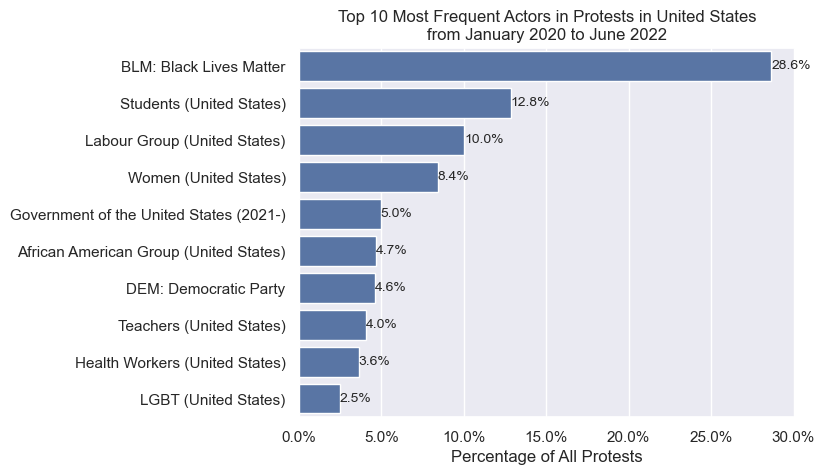

In [395]:
actors_freq_pct = protestors_freq / len(df)

ax = sns.barplot(y=actors_freq_pct[:10].index,x=actors_freq_pct[:10], color='b')
ax.bar_label(ax.containers[0], labels=[f'{i:.1%}' for i in ax.containers[0].datavalues], fontsize=10)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.title('Top 10 Most Frequent Actors in Protests in United States\nfrom January 2020 to June 2022')
plt.xlabel('Percentage of All Protests')
plt.show()

### Actors involved in Riots

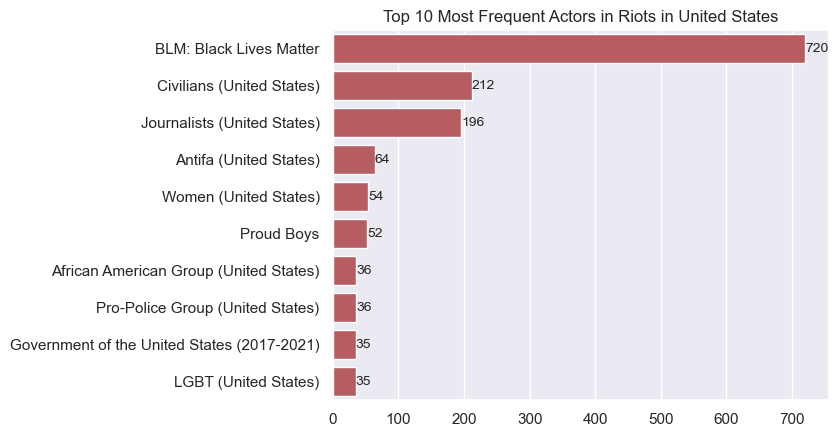

In [396]:
riotors_freq = dict()
association_actor_cols = [
    'assoc_actor_1',
    'assoc_actor_2',
]

for col in association_actor_cols:
    assoc_actors = df[df['event_type']=='Riots'][col].value_counts()
    for actors, frequency in assoc_actors.to_dict().items():
        for actor in actors.split(';'):
            actor = actor.strip()
            if actor in riotors_freq:
                riotors_freq[actor] += frequency
            else:
                riotors_freq[actor] = frequency
            
riotors_freq = pd.Series(riotors_freq)
riotors_freq = riotors_freq.sort_values(ascending=False)

ax = sns.barplot(y=riotors_freq[:10].index,x=riotors_freq[:10], color='r')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Most Frequent Actors in Riots in United States')
plt.show()

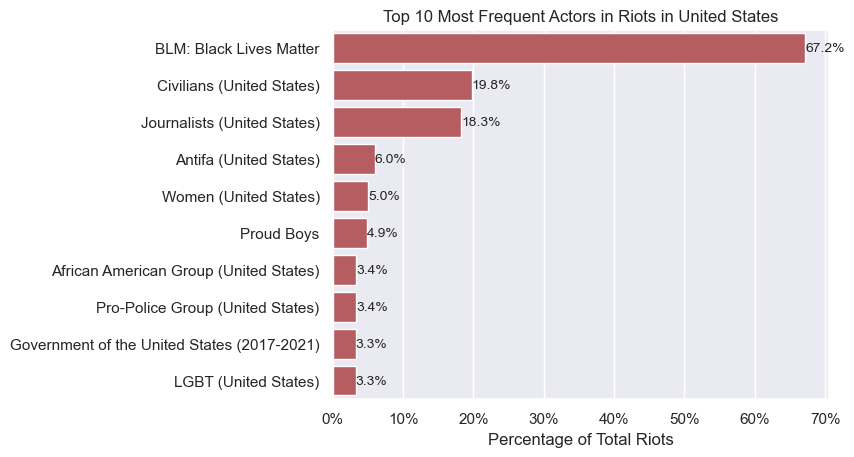

In [397]:
rioters_freq_pct = riotors_freq / len(df[df['event_type']=='Riots'])

ax = sns.barplot(y=rioters_freq_pct[:10].index,x=rioters_freq_pct[:10], color='r')
ax.bar_label(ax.containers[0], labels=[f'{i:.1%}' for i in ax.containers[0].datavalues], fontsize=10)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.title('Top 10 Most Frequent Actors in Riots in United States')
plt.xlabel('Percentage of Total Riots')
plt.show()

#### Riot-to-Protest Ratio for Actors

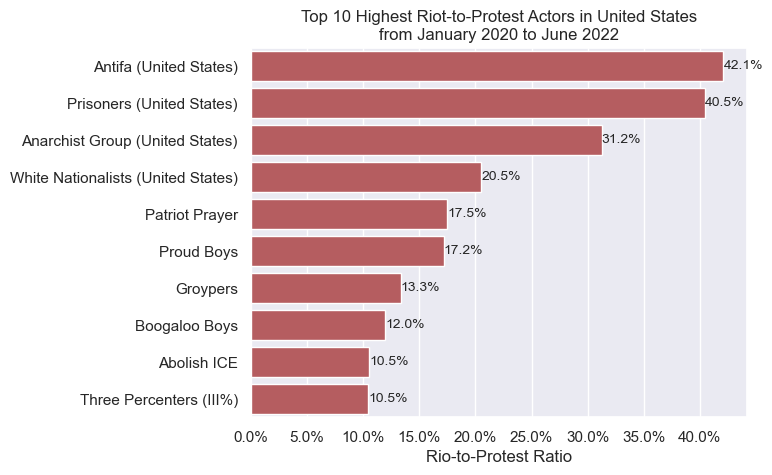

In [491]:
riot_ratio_by_actors = (riotors_freq / protestors_freq).sort_values(ascending=False)
riot_ratio_by_actors = riot_ratio_by_actors[protestors_freq >= 30]

try:
    riot_ratio_by_actors = riot_ratio_by_actors.drop(['Journalists (United States)', 'Civilians (United States)'])
except:
    pass

ax = sns.barplot(y=riot_ratio_by_actors[:10].index,x=riot_ratio_by_actors[:10], color='r')
ax.bar_label(ax.containers[0], labels=[f'{i:.1%}' for i in ax.containers[0].datavalues], fontsize=10)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.title('Top 10 Highest Riot-to-Protest Actors in United States\nfrom January 2020 to June 2022')
plt.xlabel('Rio-to-Protest Ratio')
plt.show()

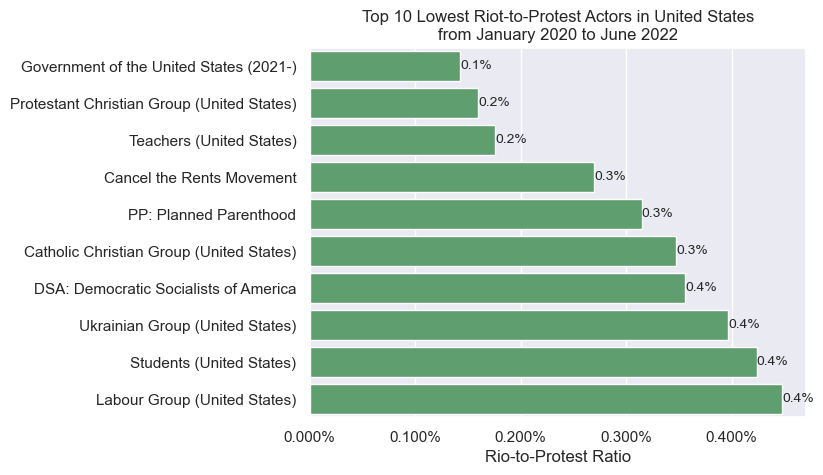

In [485]:
riot_ratio_by_actors = (riotors_freq / protestors_freq).sort_values(ascending=True)
riot_ratio_by_actors = riot_ratio_by_actors[protestors_freq >= 100]
riot_ratio_by_actors = riot_ratio_by_actors.drop(['Journalists (United States)', 'Civilians (United States)'])

ax = sns.barplot(y=riot_ratio_by_actors[:10].index,x=riot_ratio_by_actors[:10], color='g')
ax.bar_label(ax.containers[0], labels=[f'{i:.1%}' for i in ax.containers[0].datavalues], fontsize=10)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.title('Top 10 Lowest Riot-to-Protest Actors in United States\nfrom January 2020 to June 2022')
plt.xlabel('Rio-to-Protest Ratio')
plt.show()

## Notes Analysis

In [504]:
# extract protest size from notes
# pattern [size=hundereds]
df['protest_size'] = df['notes'].str.extract(r'\[size=(.*?)\]')
df['protest_size'].value_counts()

protest_size
no report                           19161
hundreds                             2797
dozens                               2614
more than 100                         873
about 100                             839
                                    ...  
around one dozen                        1
more than 300-about 2500                1
between hundreds and nearly 2000        1
between scores and about 200            1
more than 205                           1
Name: count, Length: 2034, dtype: int64

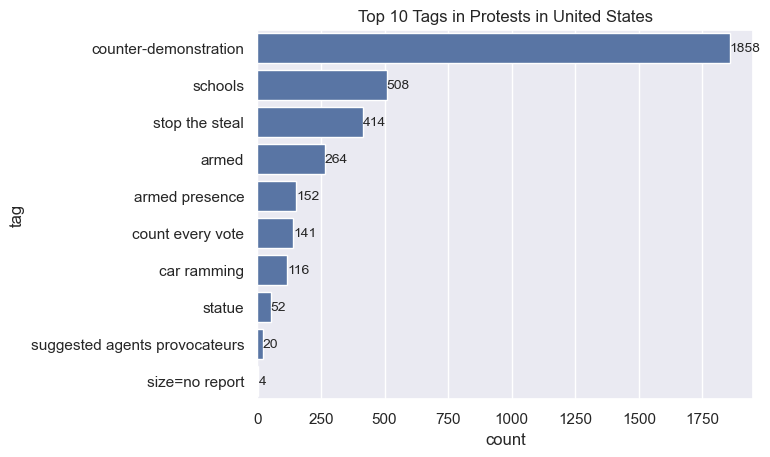

In [400]:
df['tag'] = df['notes'].str.extract(r'(?:.*?\[size=.*?\].*?)\[(.*?)\]')
tags_freq = df['tag'].value_counts()

ax = sns.barplot(y=tags_freq[:10].index,x=tags_freq[:10], color='b')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Tags in Protests in United States')
plt.show()

## New Sources Analysis

### Source

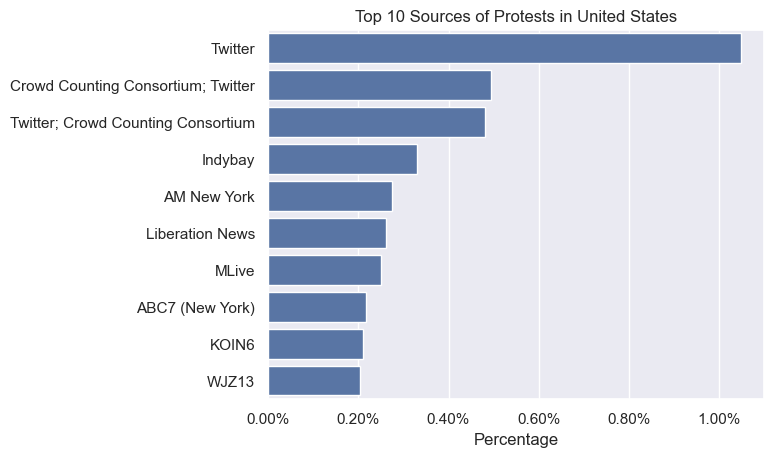

In [532]:
source_count = df['source'].value_counts()/len(df)
ax = sns.barplot(x=source_count[:10], y=source_count[:10].index, color='b')



# make horizontal axis percentage
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.title('Top 10 Sources of Protests in United States')
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

### Source Scale

<Axes: xlabel='count', ylabel='source_scale'>

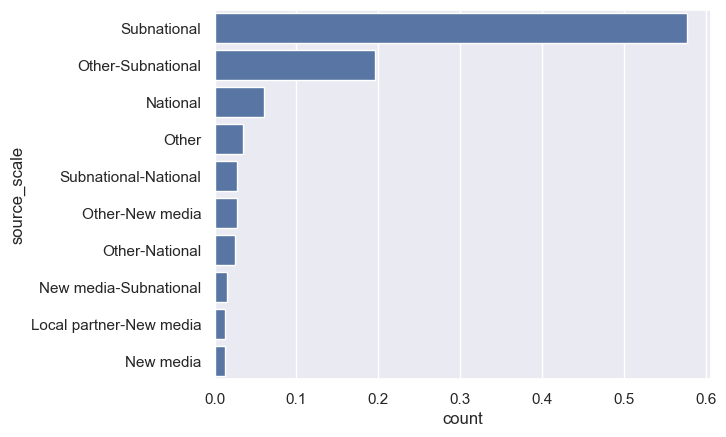

In [535]:
source_scale_count = df['source_scale'].value_counts()/len(df)
sns.barplot(x=source_scale_count[:10], y=source_scale_count[:10].index, color='b')

## Protest Messages

Make sure to run [protest_message.py](protest_message.py) before continuing this section. To run it, type this in your terminal

```bash
python3 protest_message.py
```

Or if you already ran, and the messages are still in `./protest_message` folder then you can continue this section

In [537]:
# read multiple csv files from the protest_messages folder

import os
import glob

path = './protest_messages/'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df_messages = pd.concat(df_from_each_file, ignore_index=True)

# there are csv files with "fix" in their name. It was an attempt to fix the some datapoints from the original csv files
# therefore, there can be 2 rows with the same data_id, we will drop the latter (old) one, and keep the first
df_messages = df_messages.drop_duplicates('data_id', keep='first')
df_messages = df_messages.set_index('data_id')
df_messages.columns = ['message']
df_messages

,message
data_id,
8772656,Police Brutality
8810690,Protest
7598479,Police Brutality
7598481,Police Brutality
7598256,Pharmaceutical profiteering
...,...
7616747,Mental Health
7616799,Peace
7617409,Racial justice


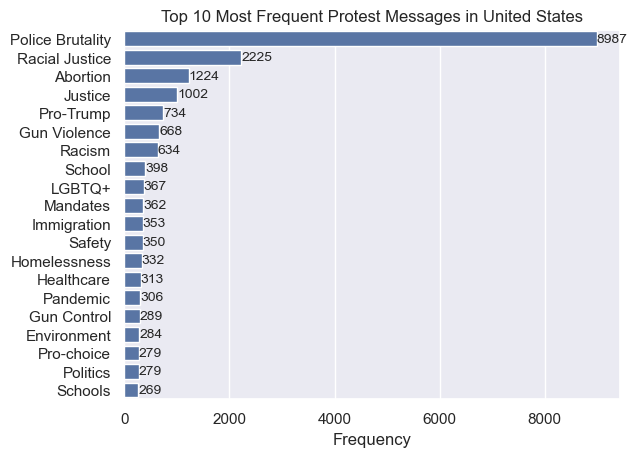

In [447]:
messages = df_messages['message'].value_counts().drop('Protest')[:20]

ax = sns.barplot(x=messages, y=messages.index, color='b')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Most Frequent Protest Messages in United States')
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

### Message overtime

In [407]:
# join df_message to df
df = df.join(df_messages, how='left', on='data_id')

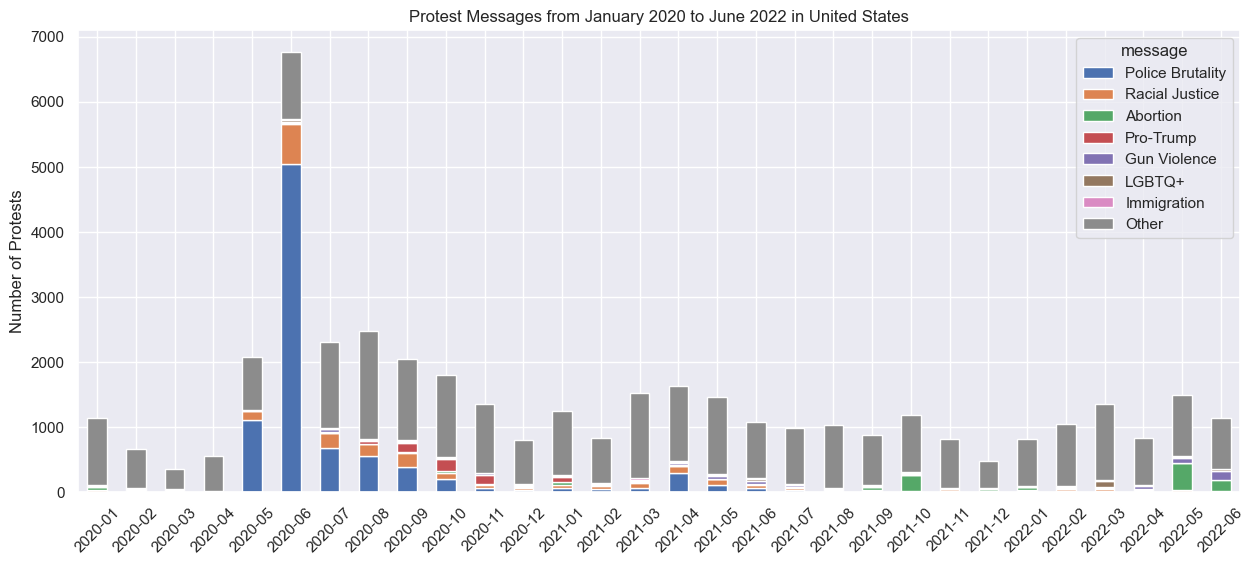

In [502]:
df_message_over_time = df.groupby(['event_date'])['message'].value_counts().unstack()
df_message_over_time = df_message_over_time[[
    'Police Brutality',
    'Racial Justice',
    'Abortion',
    'Pro-Trump',
    'Gun Violence',
    'LGBTQ+',
    'Immigration',
]]

df_message_over_time = df_message_over_time.resample('ME').sum()
df_message_over_time.index = df_message_over_time.index.strftime('%Y-%m')

monthly_protest_count = monthly_count
monthly_protest_count.index = df_message_over_time.index

df_message_over_time['Other'] = monthly_protest_count - df_message_over_time.sum(axis=1)


ax = df_message_over_time.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Number of Protests')
plt.title('Protest Messages from January 2020 to June 2022 in United States')
plt.show()

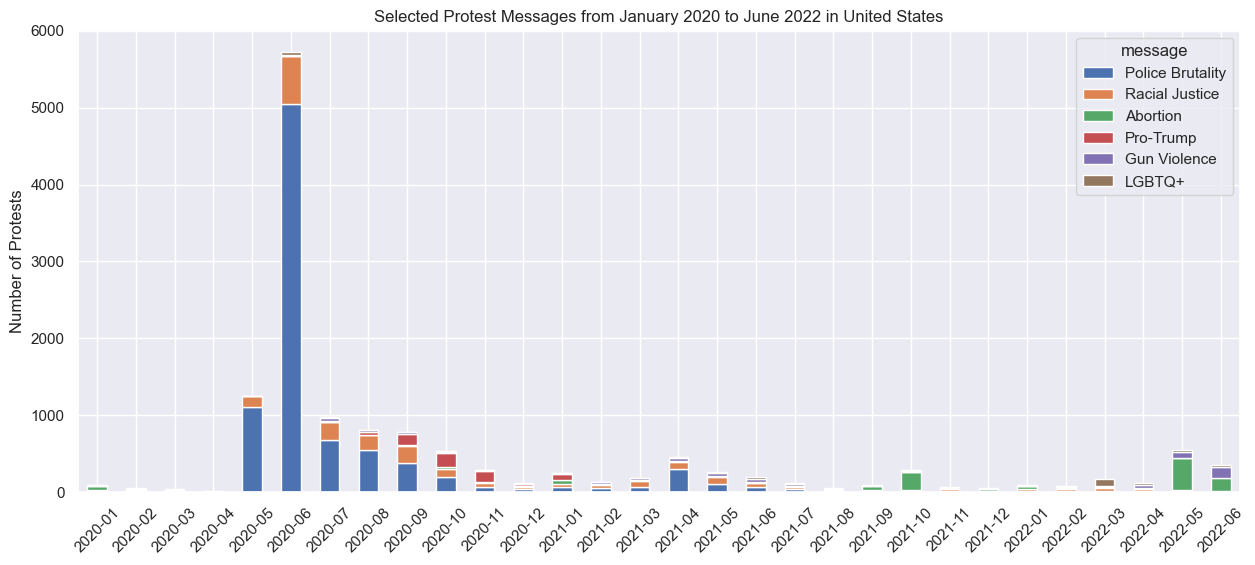

In [538]:
# "Other" can be removed from the plot to make the plot more readable

df_message_over_time = df.groupby(['event_date'])['message'].value_counts().unstack()
df_message_over_time = df_message_over_time[[
    'Police Brutality',
    'Racial Justice',
    'Abortion',
    'Pro-Trump',
    'Gun Violence',
    'LGBTQ+',
]]

df_message_over_time = df_message_over_time.resample('ME').sum()
df_message_over_time.index = df_message_over_time.index.strftime('%Y-%m')

monthly_protest_count = monthly_count
monthly_protest_count.index = df_message_over_time.index

colors = {
    'Police Brutality': 'b',
    'Racial Justice': 'r',
    'Abortion': 'g',
    'Pro-Trump': 'y',
    'Gun Violence': 'm',
    'LGBTQ+': 'c',
    'Immigration': 'orange',
}

ax = df_message_over_time.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Number of Protests')
plt.title('Selected Protest Messages from January 2020 to June 2022 in United States')
plt.show()

## Final Dataset

In [505]:
df

,event_date,year,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,admin1,admin2,location,latitude,longitude,source,source_scale,notes,protest_size,tag,message
data_id,,,,,,,,,,,,,,,,,,,
9383068,2022-06-24,2022,Protests,Excessive force against protesters,Protesters (United States),Women (United States),Sole Perpetrator (United States),NaN,Iowa,Linn,Cedar Rapids,41.9738,-91.6768,KCRG-TV9; Network Contagion Research Institute...,Local partner-National,"On 24 June 2022, 'pro-choice' protesters gathe...",no report,car ramming,Pro-choice
9383099,2022-06-24,2022,Protests,Peaceful protest,Protesters (United States),DEM: Democratic Party; Women (United States),NaN,NaN,Arkansas,Washington,Fayetteville,36.0626,-94.1574,Southwest Times Record; 40/29,Subnational,"On 24 June 2022, well over 100 people includin...",well over a hundred,NaN,Pro-Choice
9383100,2022-06-24,2022,Protests,Peaceful protest,Protesters (United States),Women (United States),NaN,NaN,California,Humboldt,Eureka,40.8040,-124.1654,Lost Coast Outpost; North Coast Journal,Subnational,"On 24 June 2022, hundreds of people rallied ou...",hundreds,NaN,Abortion
9383101,2022-06-24,2022,Protests,Peaceful protest,Protesters (United States),Women (United States); Government of the Unite...,NaN,NaN,California,Los Angeles,West Hollywood,34.0900,-118.3617,CBS News; Liveuamap,Local partner-New media,"On 24 June 2022, hundreds of people rallied in...",hundreds,NaN,Abortion
9383102,2022-06-24,2022,Protests,Peaceful protest,Protesters (United States),Women (United States),NaN,NaN,California,Monterey,Monterey,36.6031,-121.8936,Monterey County Herald; KSBW8,Subnational,"On 24 June 2022, hundreds of people rallied at...",hundreds,NaN,Abortion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616930,2020-01-01,2020,Protests,Peaceful protest,Protesters (United States),Government of the United States (2017-2021),NaN,NaN,Arizona,Maricopa,Phoenix,33.4492,-112.0741,Count Love; Channel 12 (Mesa),Other-Subnational,"On 1 January 2020, a group of people gathered ...",no report,NaN,Protest
7617409,2020-01-01,2020,Protests,Peaceful protest,Protesters (United States),NaN,NaN,NaN,New York,New York,New York - Manhattan,40.7834,-73.9663,CBS2 (New York),Subnational,"On 1 January 2020, protesters gathered at NYPD...",no report,NaN,Racial justice
7617578,2020-01-01,2020,Protests,Peaceful protest,Protesters (United States),BLM: Black Lives Matter,NaN,NaN,California,Alameda,Oakland,37.8044,-122.2711,KTVU Fox2,Subnational,"On 1 January 2020, a group of people gathered ...",no report,NaN,Unity
